# Задание 2

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.stats as sps
import math
import collections
%matplotlib inline

Считывание данных. Буду хранить данные о каждом конкретном отделении как массив из числа операторов и dataframe, в котором находятся данные о посетителях. Данные о всех отделениях хранятся в массиве bank.

In [15]:
bank = []
def getdata(i):
    #считывание данных о посетителях
    office = pd.read_csv('office_'+str(i), sep='\t', skiprows=[0])
    #считывание количества операторов
    fil = open('office_'+str(i))
    line = fil.readline()[23 : -1]
    fil.close()
    
    bank.append([int(line), office])

In [16]:
for i in np.arange(5):
    getdata(i)

1 задание.

In [17]:
def task_1(data, j):
    buf = data['arrival_times'][0]
    
    data['inc_arr'] = data.apply(lambda row: row['arrival_times'] - buf, axis=1)
    for i in np.arange(1, len(data)):
        data['inc_arr'][i] = data['arrival_times'][i] - data['arrival_times'][i];
    
    #построение графика
    plt.figure(figsize=(15, 7))
    for i in np.arange(len(data)):
        grid = np.arange(data['arrival_times'][i], data['start_service_time'][i]+1)
        plt.plot(grid, [i]*len(grid), color='red' )
        grid = np.arange(data['start_service_time'][i], data['end_service_time'][i]+1)
        plt.plot(grid, [i]*len(grid), color='green' )
    plt.xlabel("Time")
    plt.ylim(0, len(data)+1)
    plt.ylabel("Customer number")
    plt.title("The time of waiting and service in the office # "+str(j))
    plt.show()

Судя по виду диаграммы, похоже на логнормальное распределение. 

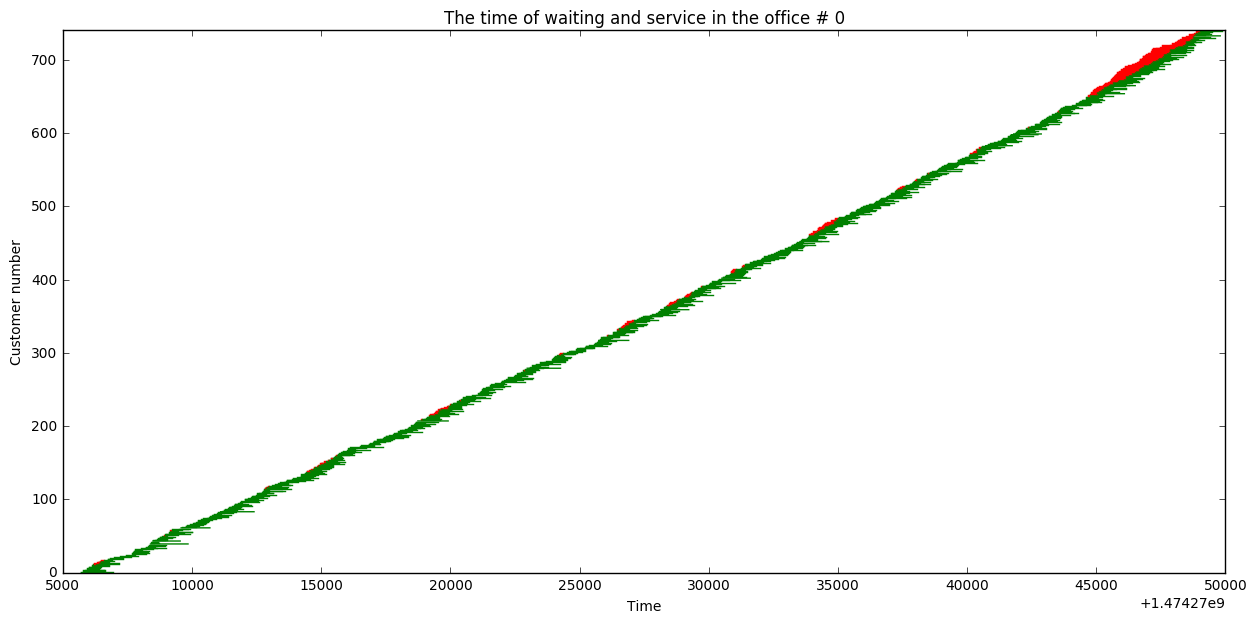

среднее время обслуживания клиента - 572.462162162
parameters: a=6.28737854603 \sigma^2=0.129337943359
Power_divergenceResult(statistic=8.1744205588843772e+24, pvalue=0.0)


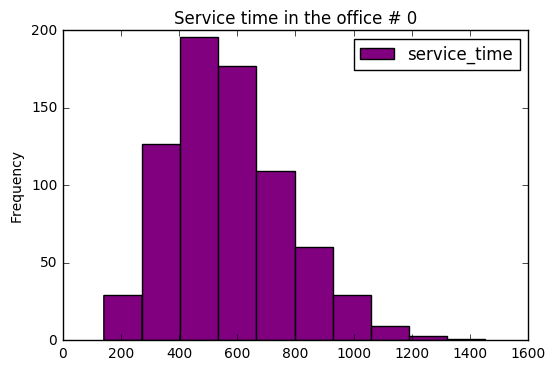

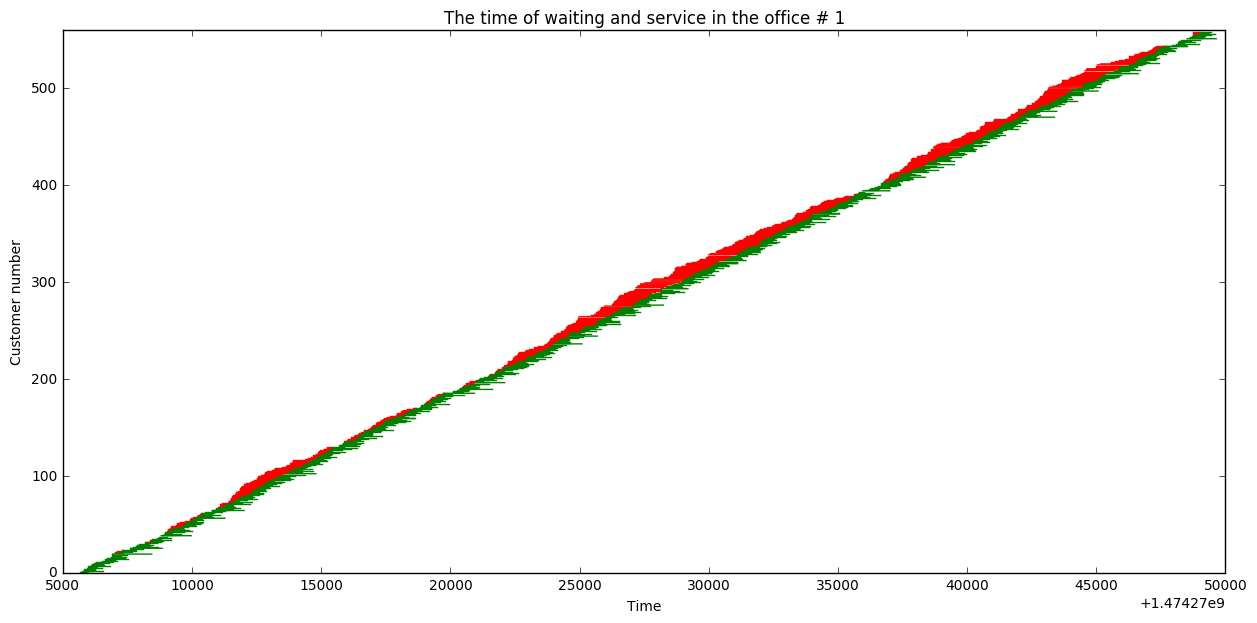

среднее время обслуживания клиента - 604.484794275
parameters: a=6.34611014057 \sigma^2=0.11675203425
Power_divergenceResult(statistic=4.5634674493204876e+20, pvalue=0.0)


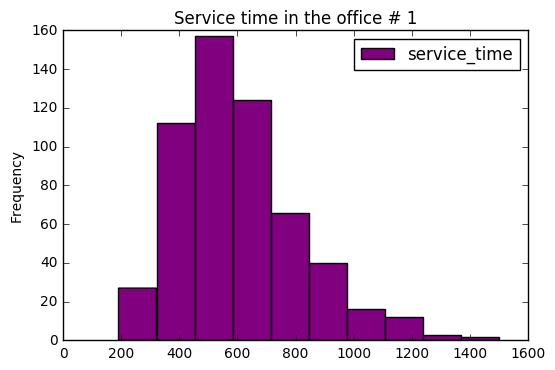

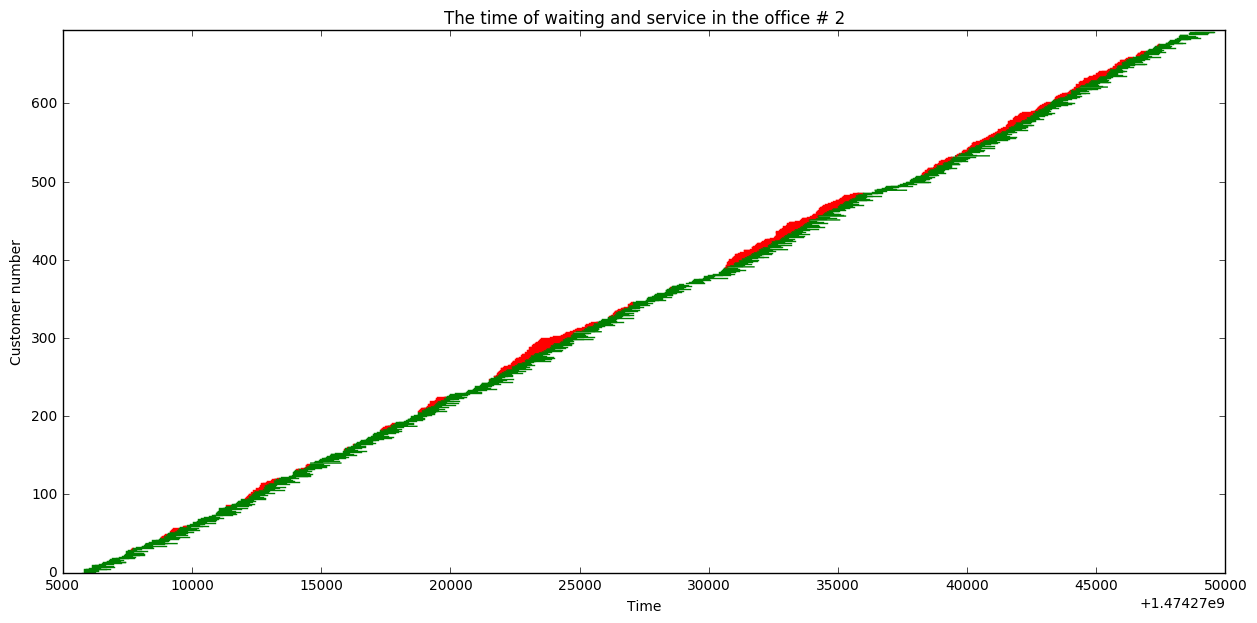

среднее время обслуживания клиента - 604.37950938
parameters: a=6.35198369358 \sigma^2=0.109521101496
Power_divergenceResult(statistic=2.5209105858647345e+27, pvalue=0.0)


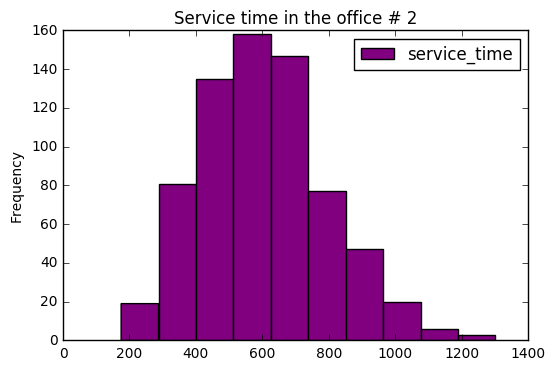

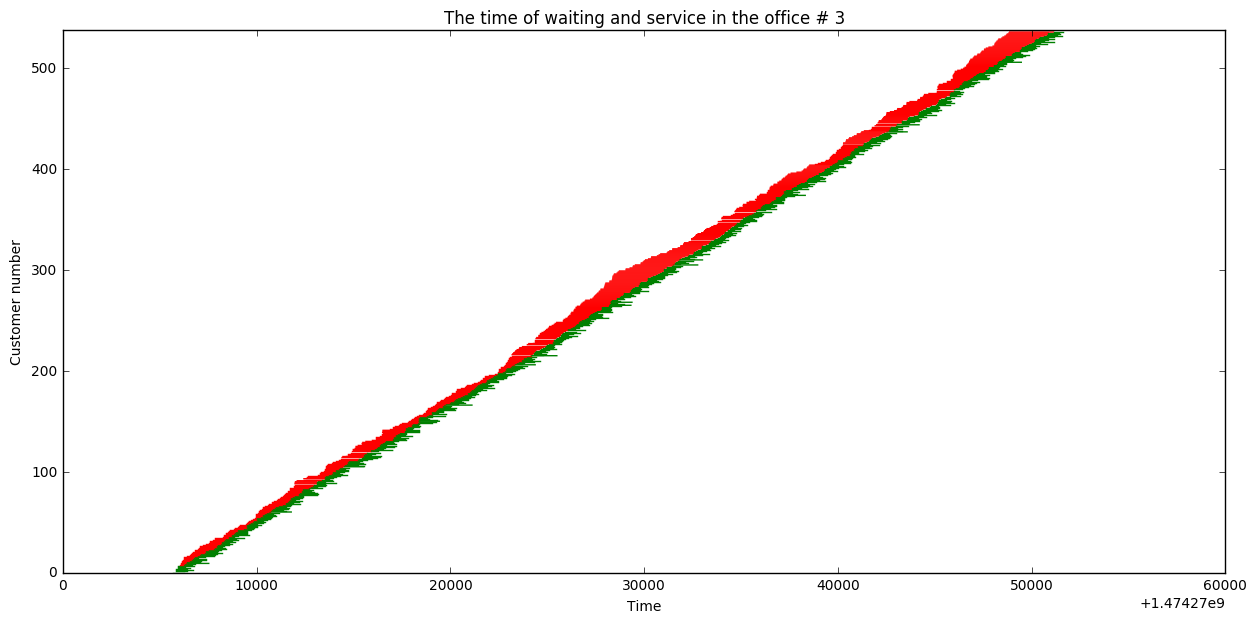

среднее время обслуживания клиента - 593.344506518
parameters: a=6.32742868291 \sigma^2=0.120480262222
Power_divergenceResult(statistic=1.2080173472037011e+21, pvalue=0.0)


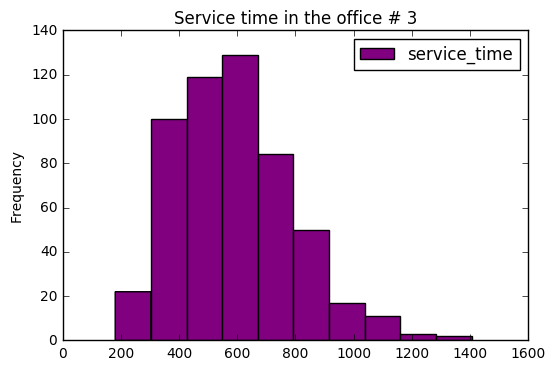

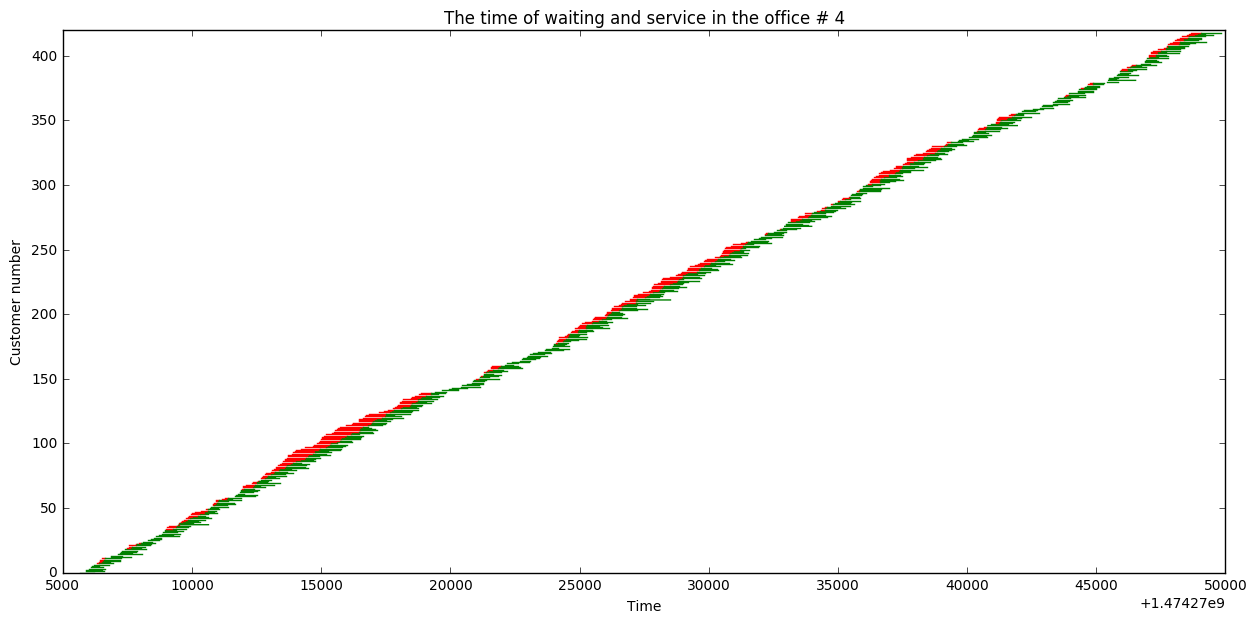

среднее время обслуживания клиента - 567.38424821
parameters: a=6.28544640986 \sigma^2=0.117904261342
Power_divergenceResult(statistic=6.9212851882928698e+23, pvalue=0.0)


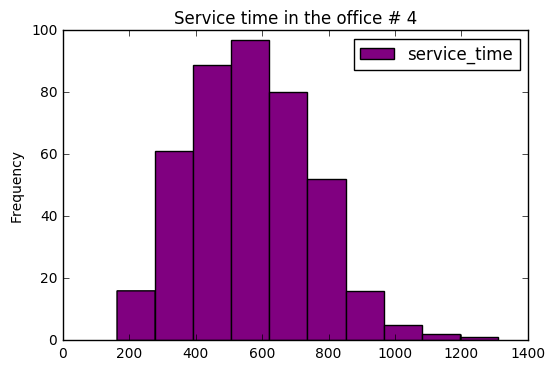

In [68]:
for i in np.arange(5):
    task_1(bank[i][1], i)
    bank[i][1]['service_time'] = bank[i][1]['end_service_time'] - bank[i][1]['start_service_time']
    bank[i][1].plot(y='service_time', kind='hist', color='purple', title='Service time in the office # '+str(i))
    print('среднее время обслуживания клиента - '+str(np.mean(bank[i][1]['service_time'])))
    data = [math.log(j) for j in bank[i][1]['service_time']]
    #оцениваем параметры распределения
    a = np.mean(data)
    sgm = np.mean([j ** 2 for j in data]) - a ** 2
    
    print('parameters: a='+str(a)+' \sigma^2='+str(sgm))
    
    j=0
    mustbe = []
    realdata = []
    c = collections.Counter(bank[i][1]['service_time'])
    for k in np.linspace(0, max(bank[i][1]['service_time']), 1000):
        su = 0
        for h in np.arange(j, k):
            su += c[h]
        prob = sps.lognorm.cdf(k, sgm, scale=math.exp(a) - sps.lognorm.cdf(j, sgm, scale=math.exp(a)))
        if(prob != 0):
            mustbe.append(prob)
            realdata.append(su)
    print(sps.chisquare(realdata, f_exp=mustbe))

##### Пуассоновские процессы
Первая серия моментов времени образует пуассоновский процесс, тк является процессом восстановления для п-ти независимых экспоненциально распределенных случайных величин с параметром лямбда ( по условию и теореме с лекции)

In [73]:
def pois(data, i):
    grid = np.arange(len(data))
    plt.figure(figsize=(15, 7))
    plt.plot(grid, data)
    plt.title('Office #'+str(i))
    plt.xlabel('Time')
    #приращения времен
    sample = [data[i] - data[i-1] for i in np.arange(1, len(data))]
    #оценим параметр по ММП
    lam = np.mean(sample)
    print("lambda = "+str(lam))
    plt.show()

lambda = 58.3775372124


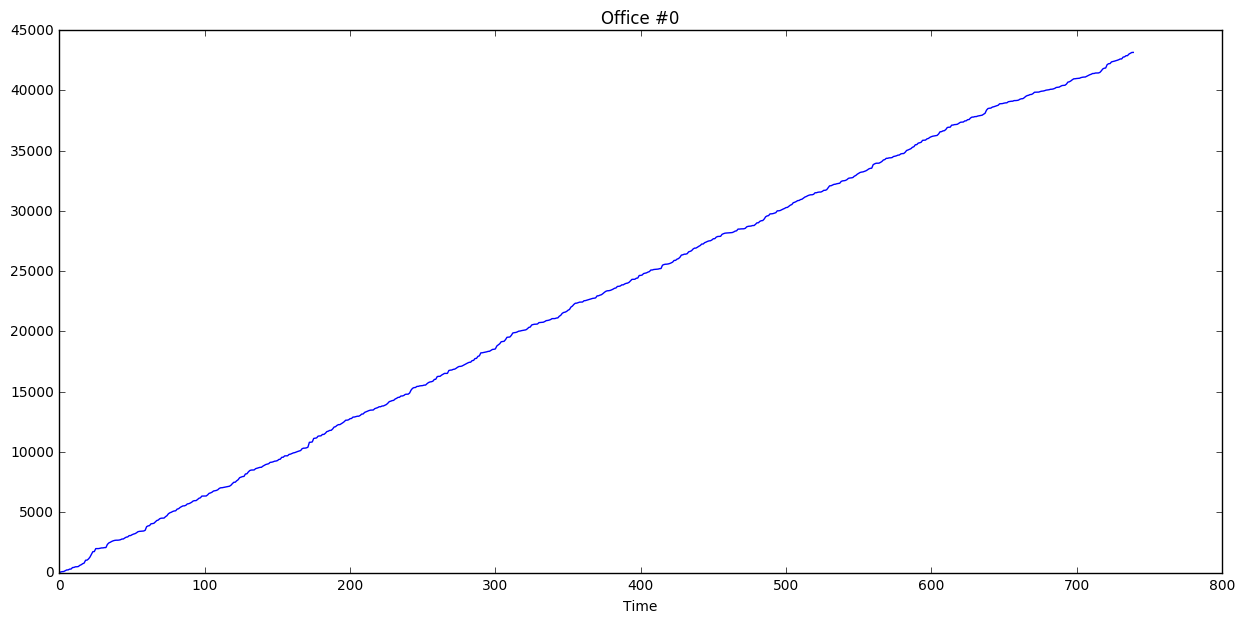

lambda = 77.2598566308


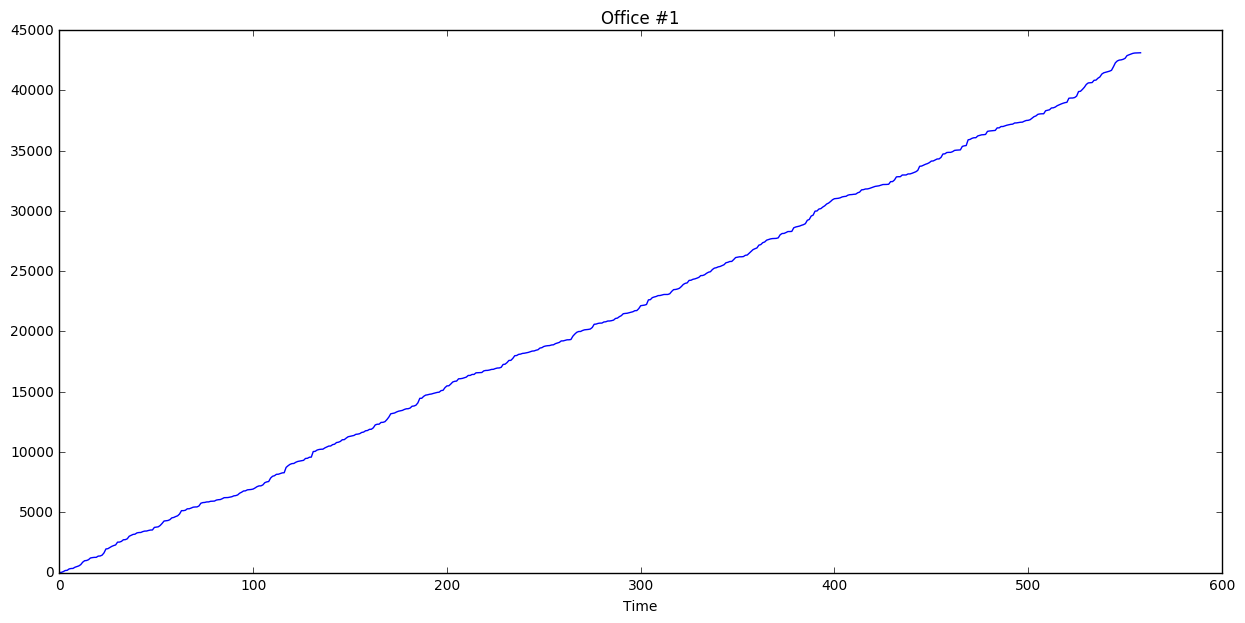

lambda = 62.2687861272


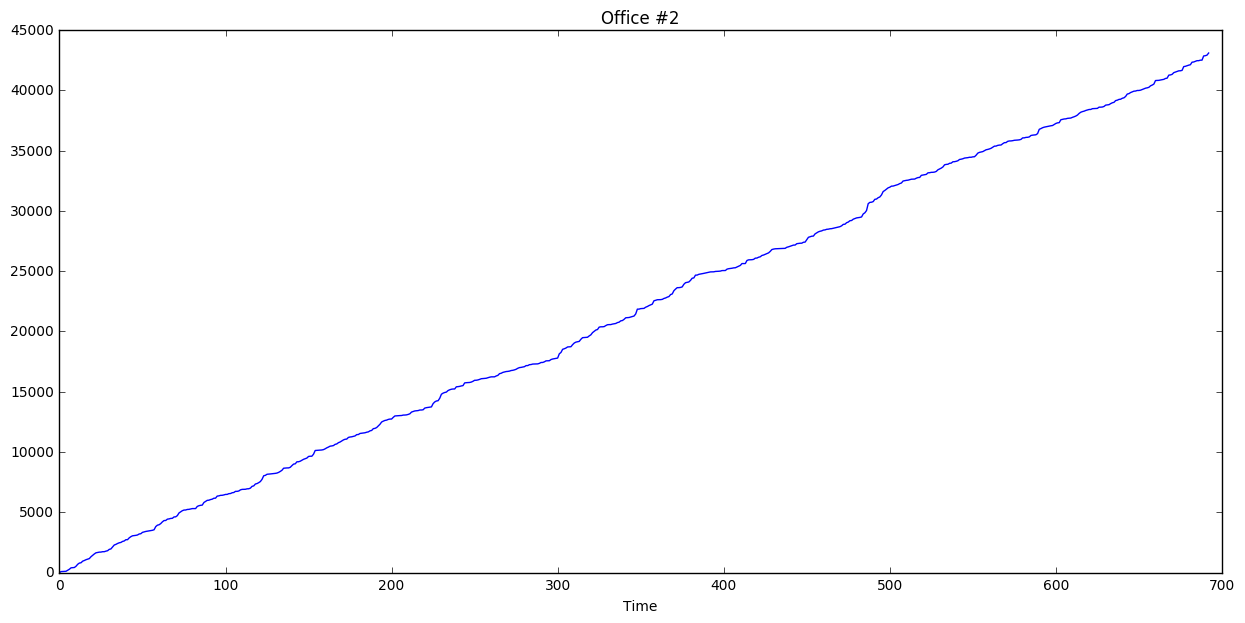

lambda = 80.5690298507


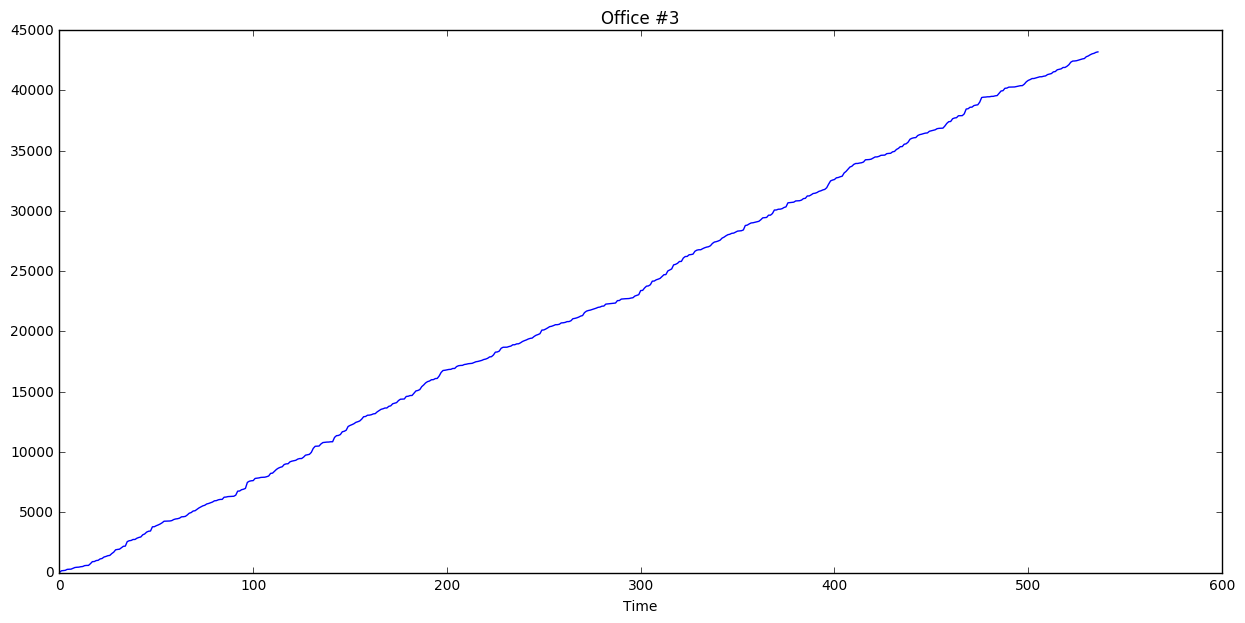

lambda = 102.928229665


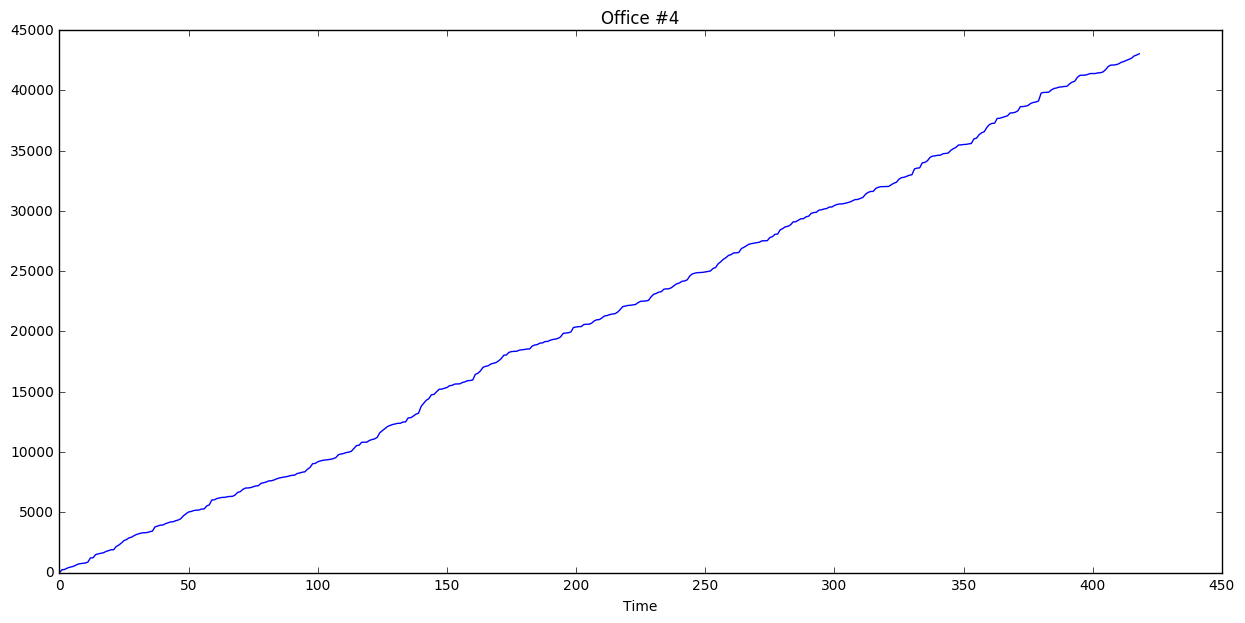

In [72]:
for i in np.arange(5):
    first = bank[i][1]['arrival_times'][0]
    bank[i][1]['pois'] = bank[i][1]['arrival_times'] - [first]*len(bank[i][1])
    pois(np.sort(bank[i][1]['pois']), i)